# Project: Wild Blueberry Yield Prediction

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df=pd.read_csv(r"C:\Users\pds\Documents\WildBlueberryPollinationSimulationData.csv")

In [3]:
print("Shape of dataset: ",df.shape)
df.head()

Shape of dataset:  (777, 18)


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df.drop('Row#', axis=1, inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [6]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [7]:
corr=df.corr()['yield'].sort_values(ascending=False)
print("Correlationship with yield: ",corr)

Correlationship with yield:  yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64


In [8]:
df.skew().sort_values(ascending=False)

honeybee                16.760583
clonesize                0.575375
andrena                  0.186850
bumbles                  0.153441
AverageRainingDays       0.072518
AverageOfLowerTRange    -0.005807
MinOfLowerTRange        -0.008517
MaxOfUpperTRange        -0.012187
MinOfUpperTRange        -0.015516
AverageOfUpperTRange    -0.016695
MaxOfLowerTRange        -0.017086
seeds                   -0.063016
fruitmass               -0.104461
RainingDays             -0.210416
yield                   -0.321858
fruitset                -0.523996
osmia                   -0.919347
dtype: float64

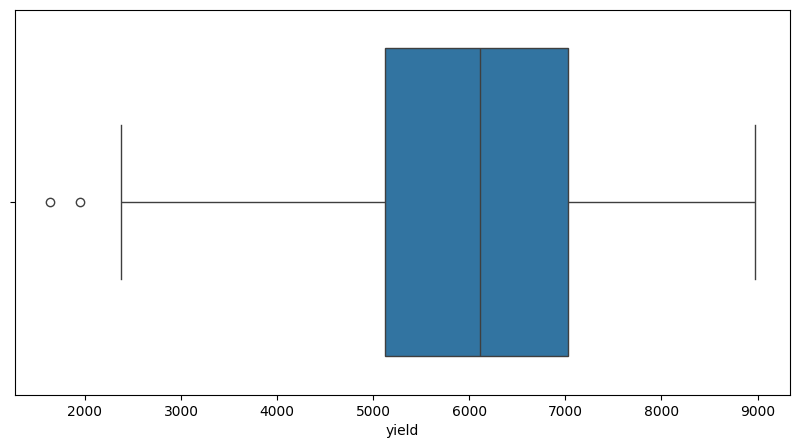

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='yield', data=df)
plt.show()

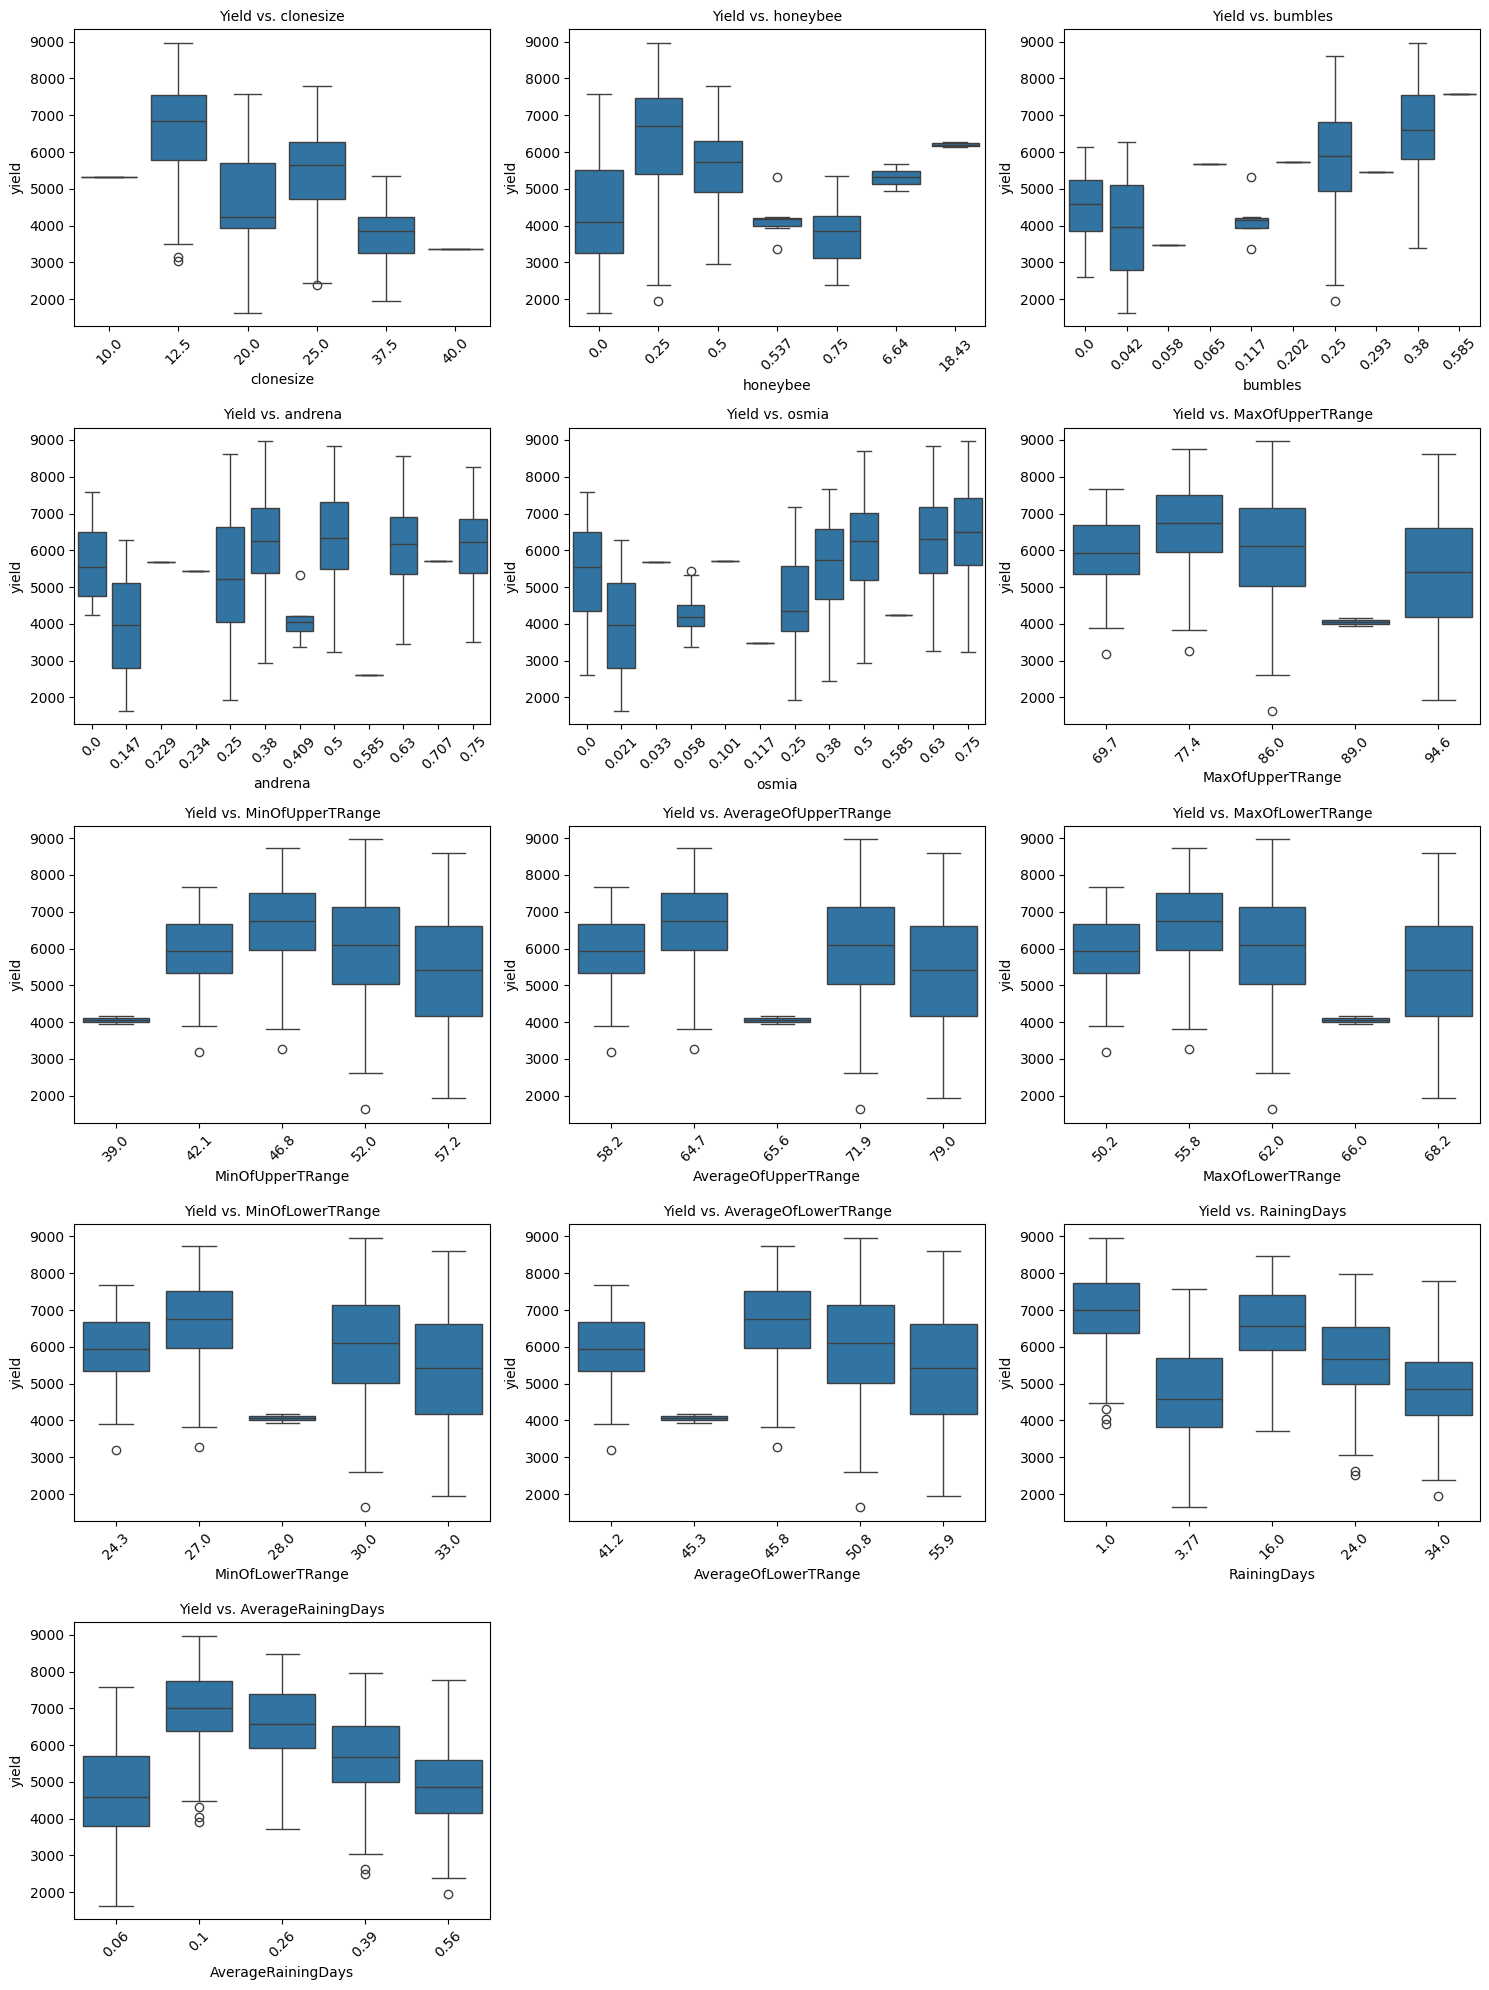

In [10]:
import math
features = df.drop(columns=['yield','fruitset','fruitmass','seeds']).columns
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(features) / n_cols)

# Create subplots
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, y='yield', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Yield vs. {col}', fontsize=10)
    plt.tight_layout()

plt.show()

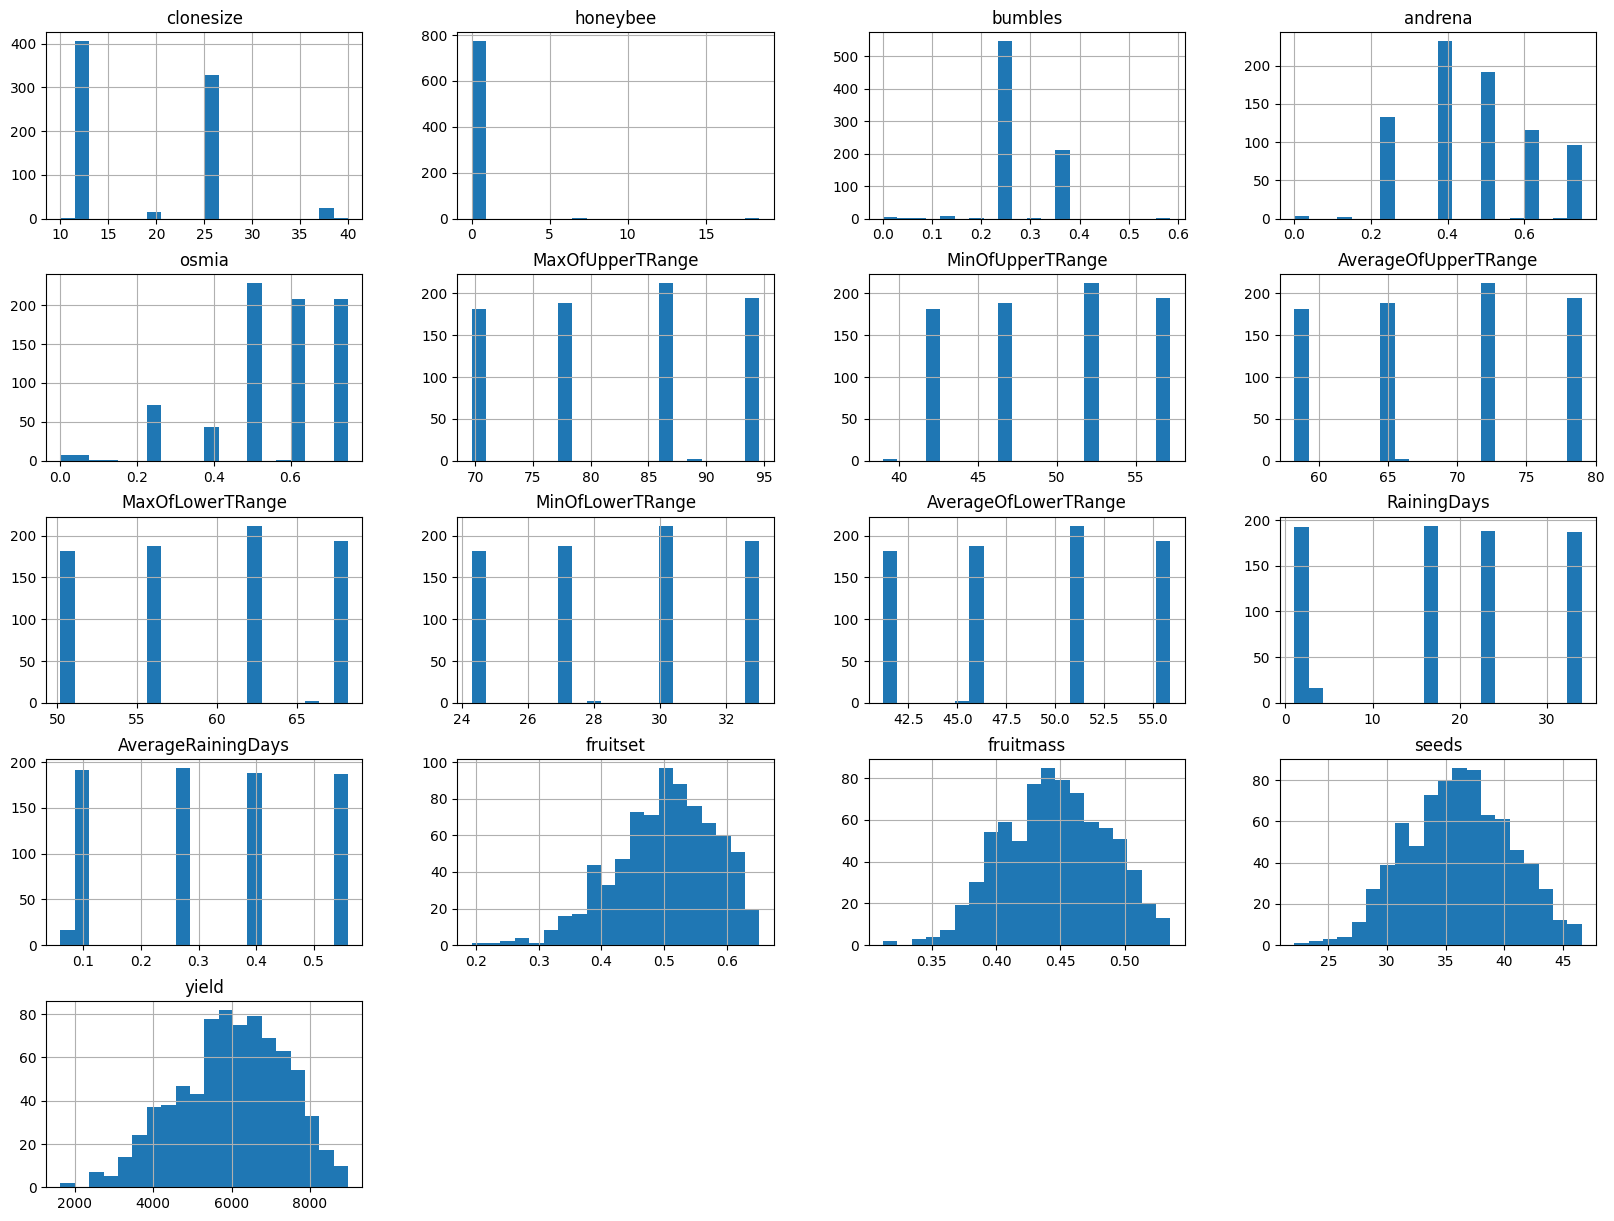

In [11]:
df.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

In [12]:
# from ydata_profiling import ProfileReport

# # Create the profile report
# profile = ProfileReport(df, title="EDA Report", explorative=True)

# # Display directly inside the notebook
# profile.to_notebook_iframe()


In [13]:
X = df.drop(columns=["yield"])
y = df["yield"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("\nTrain Shape:", X_train.shape, "Test Shape:", X_test.shape)



Train Shape: (621, 16) Test Shape: (156, 16)


In [25]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE:  {mae:.2f}")
print(f"  R²:   {r2:.4f}")


  RMSE: 154.26
  MAE:  116.49
  R²:   0.9878


In [30]:
param_grid = {
    "n_estimators": [100,150,200,],
    "max_depth": [5,10,12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt","log2"]
}

print("\n--- Hyperparameter Tuning in Progress ---")
grid_rf = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("\n--- Best Hyperparameters ---")
print(grid_rf.best_params_)


--- Hyperparameter Tuning in Progress ---

--- Best Hyperparameters ---
{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
y_pred_best = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best, "Random Forest (Tuned)")



Random Forest (Tuned) Performance:
  RMSE: 135.33
  MAE:  104.40
  R²:   0.9906


(np.float64(135.3282271148987), 104.39556053596597, 0.9905775530374293)

In [32]:
cv_score = -cross_val_score(best_rf, X, y, cv=5, scoring="neg_root_mean_squared_error")
print("\nCross-Validation RMSE: {:.2f} ± {:.2f}".format(cv_score.mean(), cv_score.std()))


Cross-Validation RMSE: 228.82 ± 91.32


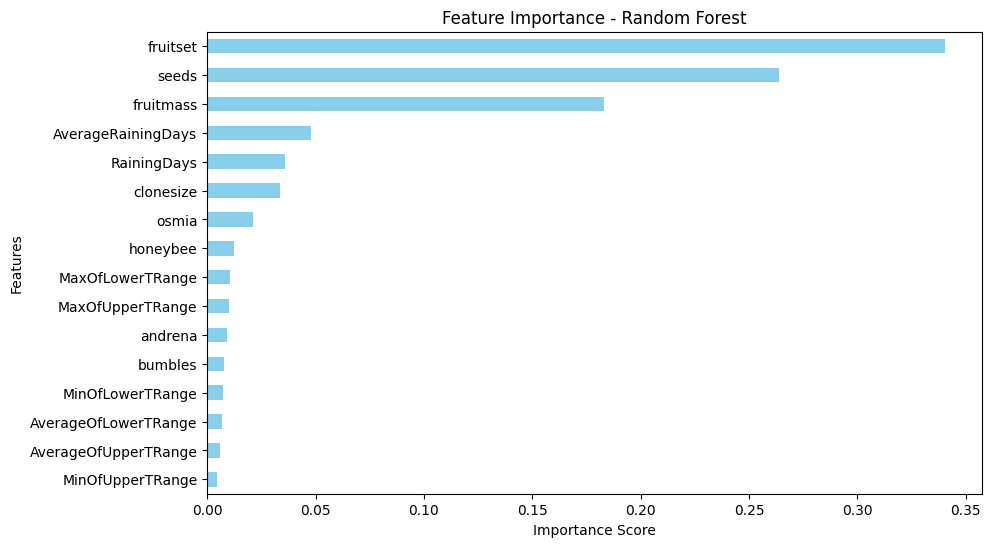

In [33]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6), color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()